# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [14]:
states = pd.read_csv("../data/states_edu.csv")
states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [47]:
states.dropna(subset=["AVG_READING_8_SCORE"], inplace=True)
states.dropna(subset=["TOTAL_REVENUE"], inplace=True)
states.dropna(subset=["INSTRUCTION_EXPENDITURE"], inplace=True)
states

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,...,67764.0,63943.0,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,...,35034.0,35936.0,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,462241.0,424768.0,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,...,54382.0,53556.0,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

In [13]:
states["YEAR"].nunique()

9

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose? Ohio

In [42]:
Michigan = states[(states["STATE"] == "MICHIGAN")]
Ohio = states[(states["STATE"] == "OHIO")]
print(Michigan.groupby("STATE")["AVG_MATH_8_SCORE"].mean())
print(Ohio.groupby("STATE")["AVG_MATH_8_SCORE"].mean())

STATE
MICHIGAN    276.166667
Name: AVG_MATH_8_SCORE, dtype: float64
STATE
OHIO    282.25
Name: AVG_MATH_8_SCORE, dtype: float64


Find the average for your chosen test across all states in 2019

In [43]:
states.groupby("STATE")["AVG_MATH_8_SCORE"].mean()

STATE
ALABAMA                 264.166667
ALASKA                  280.000000
ARIZONA                 274.666667
ARKANSAS                269.750000
CALIFORNIA              269.166667
COLORADO                283.181818
CONNECTICUT             282.250000
DELAWARE                277.181818
DISTRICT_OF_COLUMBIA    251.166667
DODEA                   287.200000
FLORIDA                 273.454545
GEORGIA                 272.833333
HAWAII                  269.583333
IDAHO                   281.833333
ILLINOIS                278.909091
INDIANA                 282.250000
IOWA                    283.818182
KANSAS                  286.100000
KENTUCKY                274.333333
LOUISIANA               265.500000
MAINE                   284.000000
MARYLAND                278.916667
MASSACHUSETTS           292.363636
MICHIGAN                276.166667
MINNESOTA               290.000000
MISSISSIPPI             264.454545
MISSOURI                279.272727
MONTANA                 286.818182
NATIONAL      

For each state, find a maximum value for your chosen test score

In [44]:
states.groupby("STATE")["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [59]:
states["FEDERAL_REVENUE_PER_STUDENTS"] = states["FEDERAL_REVENUE"] / states["ENROLL"]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENTS,FEDERAL_REVENUE_PER_STUDENTS
306,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,43957.0,473954.0,205630.0,747980.0,NaN,NaN,211.0,255.0,0.506077,0.506077
308,1998_ARIZONA,ARIZONA,1998,794331.0,4675296.0,470398.0,2000801.0,2204097.0,4726098.0,2091741.0,...,45813.0,543670.0,224867.0,848262.0,NaN,NaN,206.0,260.0,0.592194,0.592194
309,1998_ARKANSAS,ARKANSAS,1998,456355.0,2567380.0,226475.0,1505419.0,835486.0,2536027.0,1367612.0,...,29123.0,282517.0,132507.0,452256.0,NaN,NaN,209.0,256.0,0.496269,0.496269
310,1998_CALIFORNIA,CALIFORNIA,1998,5727224.0,39183018.0,3149260.0,22840500.0,13193258.0,38087666.0,20083913.0,...,334852.0,3666271.0,1627284.0,5926037.0,NaN,NaN,202.0,252.0,0.549875,0.549875
311,1998_COLORADO,COLORADO,1998,686360.0,4359021.0,215071.0,1879850.0,2264100.0,4739136.0,2253623.0,...,40076.0,436825.0,197136.0,699135.0,NaN,NaN,220.0,264.0,0.313350,0.313350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0,0.790867,0.790867
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0,0.966488,0.966488
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0,1.298299,1.298299
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0,0.944967,0.944967


Feature engineering justification: Created a column to calculate the federal revenue per student for each state. This can help us determine if federal income and the amount of students contributes to the mathmatical performance of 8th grade students.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: xlabel='FEDERAL_REVENUE_PER_STUDENTS', ylabel='AVG_MATH_8_SCORE'>

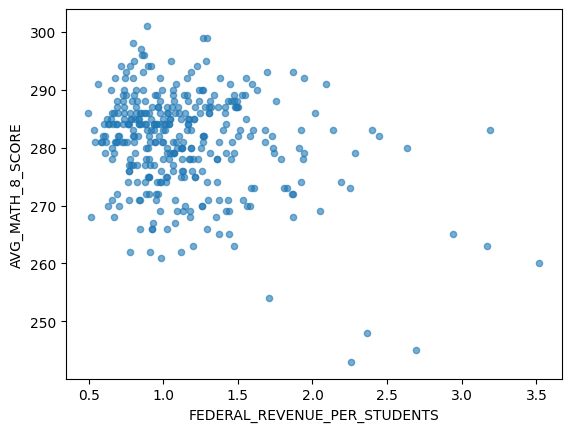

In [60]:
states.plot.scatter(x="FEDERAL_REVENUE_PER_STUDENTS", y="AVG_MATH_8_SCORE", alpha=0.6)

**<CAPTION FOR VIZ 1>**

**Visualization 2**

<Axes: xlabel='ENROLL', ylabel='AVG_MATH_8_SCORE'>

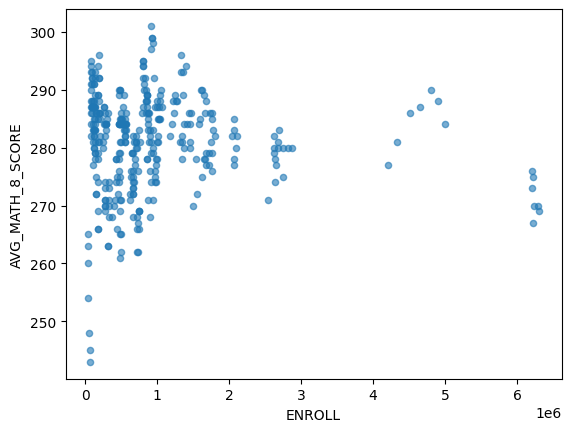

In [62]:
states.plot.scatter(x="ENROLL", y="AVG_MATH_8_SCORE", alpha=0.6)

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [91]:
from sklearn.model_selection import train_test_split

In [114]:
X = states[["ENROLL", "FEDERAL_REVENUE_PER_STUDENTS", "AVG_MATH_8_SCORE"]]
y = states.loc[X.index]['AVG_READING_8_SCORE']

In [111]:
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [115]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [116]:
# create your model here
model = LinearRegression()

In [117]:
model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [129]:
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.24018996343270152
3.1944687786688446
4.757148520276266


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [156]:
col_name = "AVG_MATH_8_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel("Math 8 Performance")
plt.title("Model Behavior On Training Set")



IndentationError: expected an indented block after function definition on line 2 (4289280580.py, line 13)

In [149]:
col_name = 'COLUMN NAME OF ONE PREDICTOR"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")